In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='Franklin Gothic Book',
rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
"axes.titlesize":20,
"axes.labelsize":18})


# fun color palette
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
      CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

In [3]:
from collections import defaultdict
import os
import os.path
import pandas as pd
import numpy as np
import pickle

from run_sequential import get_mimic_sequential_data

## 1a. MIMIC Sequential

In [154]:
fnames = os.listdir('results/')

In [48]:
X, y, years, groups = get_mimic_sequential_data()

year_counts_dict = pd.Series(years).value_counts().to_dict()

# sorted_idx = np.argsort(all_N)

In [51]:
# checked that year_counts_dict.keys() was in sequential order
print(year_counts_dict.keys())
npts_to_mark = list(np.cumsum(list(year_counts_dict.values())))

dict_keys([2008, 2011, 2014, 2017])


In [69]:
year_counts_dict

{2008: 12341, 2011: 8017, 2014: 7858, 2017: 6915}

In [55]:
npts_to_mark

[12341, 20358, 28216, 35131]

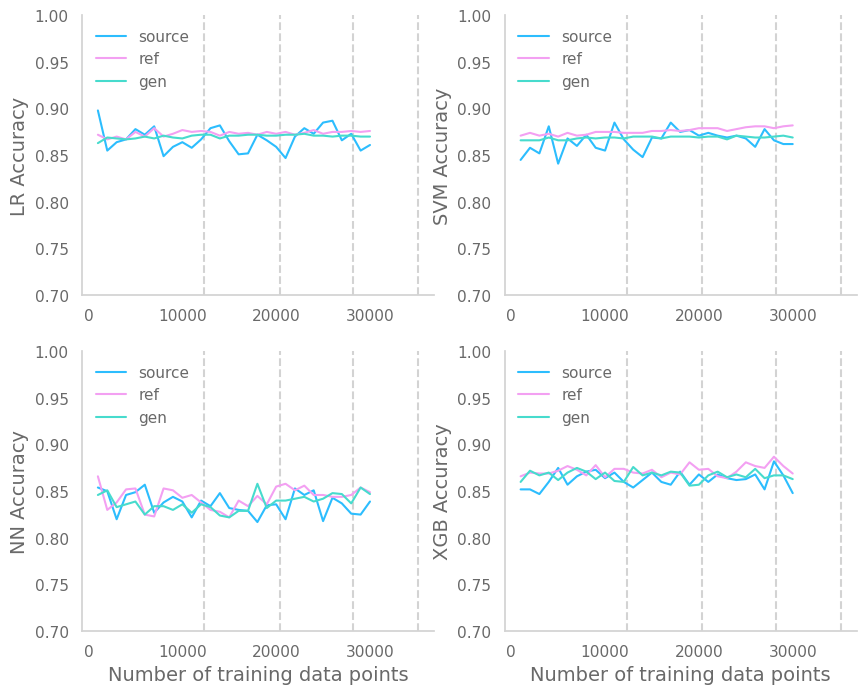

In [68]:
fig, axs = plt.subplots(2,2, figsize=(10,8))

for ix, (ax, current_model) in enumerate(zip(axs.flat, ['lr', 'svm', 'nn', 'xgb'])):
    all_source = []
    all_ref = []
    all_gen = []
    all_N = []

    for fname in fnames:
        N = int(fname.split('_')[2])
        model = fname.split('_')[1]
        if model == current_model and 'mimic' in fname:
            data = pickle.load(open('results/'+fname, 'rb'))

            all_source.append(data['acc_source'])
            all_ref.append(data['acc_ref'])
            all_gen.append(data['acc_gen'])
            all_N.append(N) 

    sorted_idx = np.argsort(all_N)
    all_source = np.array(all_source)[sorted_idx]
    all_ref = np.array(all_ref)[sorted_idx]
    all_gen = np.array(all_gen)[sorted_idx]
    all_N = np.array(all_N)[sorted_idx]
    
#     plt.figure(figsize=(6,4))
    for pt in npts_to_mark:
        ax.axvline(pt,color='#D3D3D3',linestyle='--')
    ax.plot(all_N, all_source, label='source')
    ax.plot(all_N, all_ref, label='ref')
    ax.plot(all_N, all_gen, label='gen')
    if ix > 1:
        ax.set_xlabel('Number of training data points', fontsize=14)
    ax.set_ylabel('%s Accuracy' % current_model.upper(), fontsize=14)
    ax.set_ylim(0.7,1)
    ax.legend(frameon=False)l
plt.savefig('mimic_seq_results.pdf')

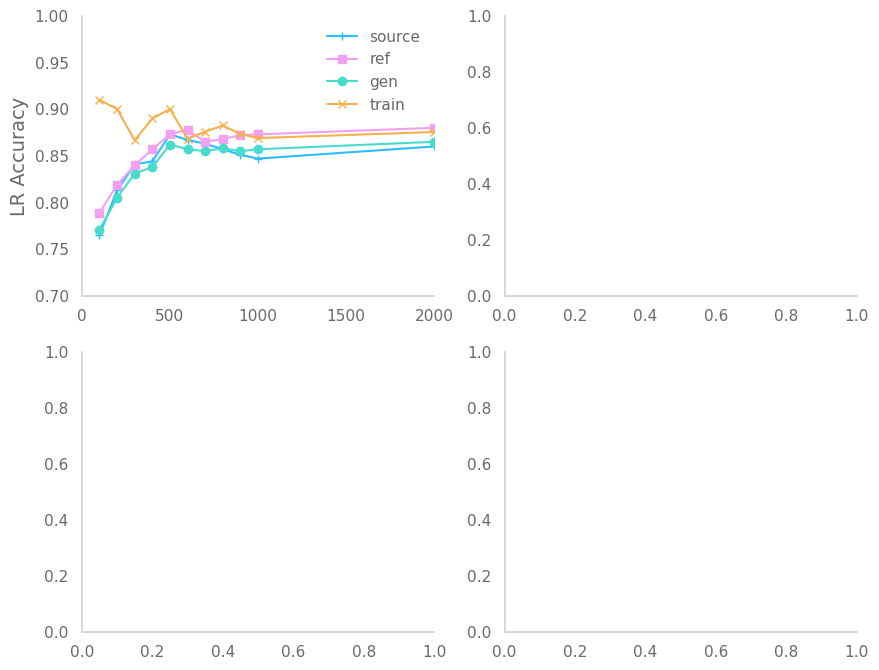

In [165]:
fig, axs = plt.subplots(2,2, figsize=(10,8))

for ix, (ax, current_model) in enumerate(zip(axs.flat, ['lr'])):
    all_source = []
    all_ref = []
    all_gen = []
    all_train = []
    all_N = []

    for fname in fnames:
        N = int(fname.split('_')[2])
        model = fname.split('_')[1]
        if model == current_model and 'mimic' in fname and 'sequential' in fname:
            data = pickle.load(open('results/'+fname, 'rb'))

            all_source.append(data['acc_source'])
            all_ref.append(data['acc_ref'])
            all_gen.append(data['acc_gen'])
            all_train.append(data['acc_train'])
            all_N.append(N) 

    sorted_idx = np.argsort(all_N)
    all_source = np.array(all_source)[sorted_idx]
    all_ref = np.array(all_ref)[sorted_idx]
    all_gen = np.array(all_gen)[sorted_idx]
    all_train = np.array(all_train)[sorted_idx]
    all_N = np.array(all_N)[sorted_idx]
    
#     plt.figure(figsize=(6,4))
    # for pt in npts_to_mark:
    #     ax.axvline(pt,color='#D3D3D3',linestyle='--')
    ax.plot(all_N, all_source, label='source', marker='+')
    ax.plot(all_N, all_ref, label='ref', marker='s')
    ax.plot(all_N, all_gen, label='gen', marker='o')
    ax.plot(all_N, all_train, label='train',marker='x')
    if ix > 1:
        ax.set_xlabel('Number of training data points', fontsize=14)
    ax.set_ylabel('%s Accuracy' % current_model.upper(), fontsize=14)
    ax.set_ylim(0.7,1)
    ax.set_xlim(0,2000)
    ax.legend(frameon=False)
# plt.savefig('mimic_seq_results.pdf')

In [159]:
all_N

array([  100,   200,   300,   400,   500,   600,   700,   800,   900,
        1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000,
       19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000,
       28000, 29000, 30000])

## 1b. MIMIC mixture

In [115]:
fnames = os.listdir('results/')

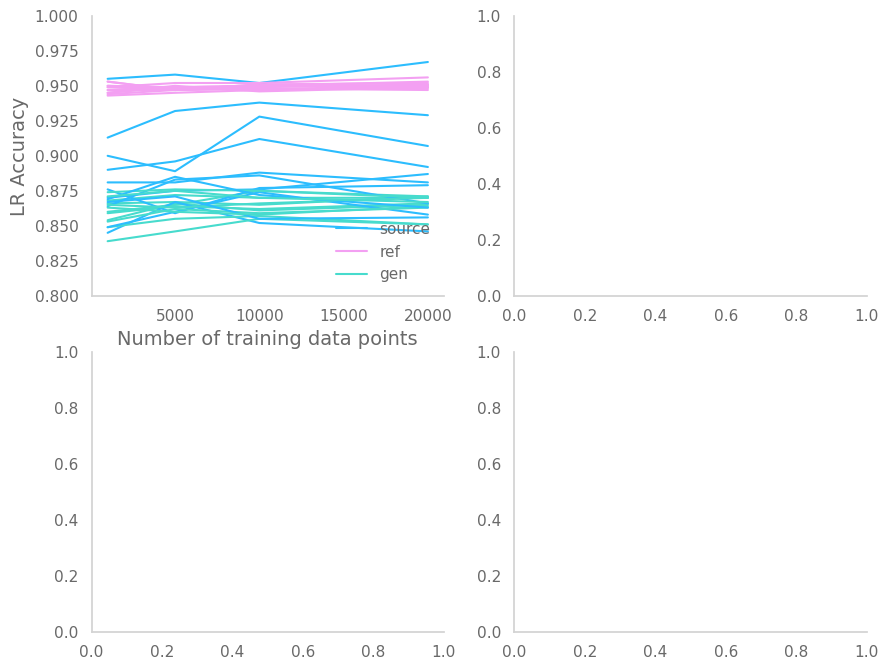

In [136]:
fig, axs = plt.subplots(2,2, figsize=(10,8))



for ix, (ax, current_model) in enumerate(zip(axs.flat, ['lr'])):
    all_source = []
    all_ref = []
    all_gen = []
    all_N = []
    plot_results = defaultdict(dict)
    
    for fname in fnames:
        model = fname.split('_')[1]
        if model == current_model and 'mimic' in fname and 'mixture' in fname:
            n1 = int(fname.split('_')[2])
            try:
                n2 = int(fname.split('_')[3])
            except:
                print(fname)
            n3 = int(fname.split('_')[4])
            
            N = n1 + n2 + n3
            
            r1 = n1 / N
            r2 = n2 / N
            r3 = n3 / N
            
            
            data = pickle.load(open('results/'+fname, 'rb'))

            acc_source_lst = plot_results[(r1, r2, r3)].get('acc_source', [])
            acc_source_lst.append(data['acc_source'])
            plot_results[(r1, r2, r3)]['acc_source'] = acc_source_lst
            
            acc_source_lst = plot_results[(r1, r2, r3)].get('acc_ref', [])
            acc_source_lst.append(data['acc_ref'])
            plot_results[(r1, r2, r3)]['acc_ref'] = acc_source_lst
            
            acc_source_lst = plot_results[(r1, r2, r3)].get('acc_gen', [])
            acc_source_lst.append(data['acc_gen'])
            plot_results[(r1, r2, r3)]['acc_gen'] = acc_source_lst
            
            acc_source_lst = plot_results[(r1, r2, r3)].get('all_N', [])
            acc_source_lst.append(N)
            plot_results[(r1, r2, r3)]['all_N'] = acc_source_lst
            

    for ix, (ratio_key, values) in enumerate(plot_results.items()):
        sorted_idx = np.argsort(values['all_N'])
        all_source = np.array(values['acc_source'])[sorted_idx]
        all_ref = np.array(values['acc_ref'])[sorted_idx]
        all_gen = np.array(values['acc_gen'])[sorted_idx]
        all_N = np.array(values['all_N'])[sorted_idx]
    
#     plt.figure(figsize=(6,4))
    # for pt in npts_to_mark:
    #     ax.axvline(pt,color='#D3D3D3',linestyle='--')
        if ix == 0:
            ax.plot(all_N[:-1], all_source[:-1], label='source', color='C0')
            ax.plot(all_N[:-1], all_ref[:-1], label='ref', color='C1')
            ax.plot(all_N[:-1], all_gen[:-1], label='gen', color='C2')
        else:
            ax.plot(all_N[:-1], all_source[:-1], color='C0')
            ax.plot(all_N[:-1], all_ref[:-1], color='C1')
            ax.plot(all_N[:-1], all_gen[:-1], color='C2')
    if ix > 1:
        ax.set_xlabel('Number of training data points', fontsize=14)
    ax.set_ylabel('%s Accuracy' % current_model.upper(), fontsize=14)
    ax.set_ylim(0.8,1)
    ax.legend(frameon=False)
plt.savefig('mimic_mix_results.pdf')

In [71]:
DATA_DIR = '../mimic-data/'

In [74]:
tab_cols = ['heartrate_min',
       'heartrate_max', 'heartrate_mean', 'sysbp_min', 'sysbp_max',
       'sysbp_mean', 'diasbp_min', 'diasbp_max', 'diasbp_mean', 'meanbp_min',
       'meanbp_max', 'meanbp_mean', 'resprate_min', 'resprate_max',
       'resprate_mean', 'tempc_min', 'tempc_max', 'tempc_mean', 'spo2_min',
       'spo2_max', 'spo2_mean', 'glucose_min', 'glucose_max', 'glucose_mean',
       'aniongap', 'albumin', 'bicarbonate', 'bilirubin', 'creatinine',
       'chloride', 'glucose', 'hematocrit', 'hemoglobin', 'lactate',
       'magnesium', 'phosphate', 'platelet', 'potassium', 'ptt', 'inr', 'pt',
       'sodium', 'bun', 'wbc', 'had_null', 'oasis', 'oasis_prob', 'sofa',
       'saps', 'sapsii', 'sapsii_prob', 'apsiii', 'apsiii_prob', 'lods']

In [75]:
pat_df = pd.read_csv(DATA_DIR+'patients_notes_insur.csv')
tab_df = pd.read_csv(DATA_DIR+'adult_icu_race_mortality.csv')

join_cols = ['subject_id', 'hadm_id', 'icustay_id']
pat_df = pat_df.merge(tab_df[join_cols+tab_cols], on=join_cols, how='inner')
pat_df.to_csv('adult_notes_labs_race_mortality.csv',index=False)

In [86]:
df = pat_df
adm_cols = [i for i in df.columns if 'admType' in i]
eth_cols = [i for i in df.columns if 'eth_' in i]

df['admType'] = df[adm_cols].idxmax(axis=1)
df['eth'] = df[eth_cols].idxmax(axis=1)

In [ ]:
df[adm_cols].idxmax(axis=1)

In [83]:
adm_cols

['admType_ELECTIVE', 'admType_EMERGENCY', 'admType_NEWBORN', 'admType_URGENT']

In [78]:
pat_df.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'chartext', 'gender', 'age',
       'insurance', 'mort_hosp', 'mort_icu', 'mort_oneyr', 'first_hosp_stay',
       'first_icu_stay', 'adult_icu', 'eth_asian', 'eth_black', 'eth_hispanic',
       'eth_other', 'eth_white', 'admType_ELECTIVE', 'admType_EMERGENCY',
       'admType_NEWBORN', 'admType_URGENT', 'heartrate_min', 'heartrate_max',
       'heartrate_mean', 'sysbp_min', 'sysbp_max', 'sysbp_mean', 'diasbp_min',
       'diasbp_max', 'diasbp_mean', 'meanbp_min', 'meanbp_max', 'meanbp_mean',
       'resprate_min', 'resprate_max', 'resprate_mean', 'tempc_min',
       'tempc_max', 'tempc_mean', 'spo2_min', 'spo2_max', 'spo2_mean',
       'glucose_min', 'glucose_max', 'glucose_mean', 'aniongap', 'albumin',
       'bicarbonate', 'bilirubin', 'creatinine', 'chloride', 'glucose',
       'hematocrit', 'hemoglobin', 'lactate', 'magnesium', 'phosphate',
       'platelet', 'potassium', 'ptt', 'inr', 'pt', 'sodium', 'bun', 'wbc',
       'had_null', 'o

## 2. Peek at Yelp Results

In [127]:
fnames = os.listdir('results/')
print('fname acc_source acc_ref acc_gen')

for fname in fnames:
    if 'yelp' in fname:
        data = pickle.load(open('results/'+fname, 'rb'))
        
        print(fname, data['acc_source'], data['acc_ref'], data['acc_gen'])

fname acc_source acc_ref acc_gen
yelp_lr_171000_sequential.pk 0.898 0.925 0.904
yelp_lr_131000_sequential.pk 0.889 0.926 0.905
yelp_lr_191000_sequential.pk 0.89 0.922 0.907
yelp_lr_51000_sequential.pk 0.908 0.925 0.906
yelp_lr_41000_sequential.pk 0.913 0.922 0.903
yelp_lr_21000_sequential.pk 0.896 0.924 0.907
yelp_lr_111000_sequential.pk 0.902 0.921 0.905
yelp_lr_121000_sequential.pk 0.915 0.925 0.905
yelp_lr_211000_sequential.pk 0.9 0.922 0.907
yelp_lr_91000_sequential.pk 0.911 0.922 0.904
yelp_lr_181000_sequential.pk 0.911 0.922 0.904
yelp_nn_1000_sequential.pk 0.825 0.834 0.818
yelp_lr_71000_sequential.pk 0.911 0.925 0.908
yelp_lr_221000_sequential.pk 0.887 0.921 0.907
yelp_lr_231000_sequential.pk 0.914 0.921 0.908
yelp_lr_1000_sequential.pk 0.895 0.916 0.903
yelp_lr_11000_sequential.pk 0.895 0.925 0.907
yelp_lr_61000_sequential.pk 0.912 0.926 0.906
yelp_lr_81000_sequential.pk 0.915 0.924 0.906
yelp_svm_1000_sequential.pk 0.91 0.918 0.914
yelp_lr_161000_sequential.pk 0.915 0.921 0.9

## 2a. Yelp Sequential Results

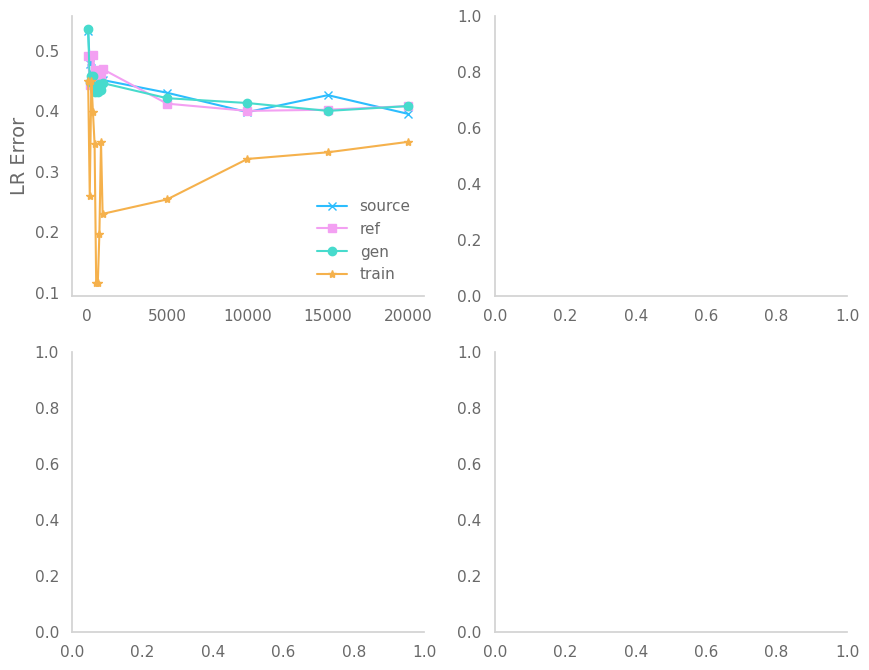

In [31]:
fnames = os.listdir('results/')

fig, axs = plt.subplots(2,2, figsize=(10,8))

for ix, (ax, current_model) in enumerate(zip(axs.flat, ['lr'])):
    all_source = []
    all_ref = []
    all_gen = []
    all_train = []
    all_N = []

    for fname in fnames:
        N = int(fname.split('_')[2])
        model = fname.split('_')[1]
        if model == current_model and 'yelp' in fname and 'sequential' in fname:
            data = pickle.load(open('results/'+fname, 'rb'))

            all_source.append(data['acc_source'])
            all_ref.append(data['acc_ref'])
            all_gen.append(data['acc_gen'])
            all_train.append(data['acc_train'])
            all_N.append(N) 

    sorted_idx = np.argsort(all_N)
    all_source = np.array(all_source)[sorted_idx]
    all_ref = np.array(all_ref)[sorted_idx]
    all_gen = np.array(all_gen)[sorted_idx]
    all_train = np.array(all_train)[sorted_idx]
    all_N = np.array(all_N)[sorted_idx]
    
#     plt.figure(figsize=(6,4))
    # for pt in npts_to_mark:
    #     ax.axvline(pt,color='#D3D3D3',linestyle='--')
    ax.plot(all_N, 1-all_source, label='source', marker='x')
    ax.plot(all_N, 1-all_ref, label='ref', marker='s')
    ax.plot(all_N, 1-all_gen, label='gen',marker='o')
    ax.plot(all_N, 1-all_train, label='train',marker='*')
    # ax.set_xlim(0,1000)
    if ix > 1:
        ax.set_xlabel('Number of training data points', fontsize=14)
    ax.set_ylabel('%s Error' % current_model.upper(), fontsize=14)
    ax.legend(frameon=False)
plt.savefig('yelp_seq_results.pdf')

In [4]:
from run_sequential import get_yelp_sequential_data

In [7]:
source_file = "2007_2006_yelp.csv"
df_yr = pd.read_csv(source_file)

#clean up
# df_yr["year"] = yr
df_yr['categories_lst'] = df_yr['categories'].apply(lambda x: x.split(', '))

In [21]:
df['group'] = df['categories'].apply(get_group)

In [23]:
df['group'].value_counts()

Other            2033
American         1000
Italian           224
Mexican           179
Japanese          135
Chinese           107
Asian Fusion       42
Thai               41
Mediterranean      36
Vietnamese         34
Southern           22
Name: group, dtype: int64

In [10]:
df['categories_lst'].values[0]

['Restaurants', 'Food', 'Coffee & Tea']

In [20]:
ethnic_categories = [
'American',
    'Italian',
    'Mexican',
    'Japanese',
    'Chinese',
    'Southern',
    'Vietnamese',
    'Asian Fusion',
    'Mediterranean',
    'Thai'
]

def get_group(s):
    for cat in ethnic_categories:
        if cat in s:
            return cat
    else:
        return 'Other'

In [14]:
import itertools

all_cat = list(itertools.chain(*df['categories_lst'].values))


In [19]:
pd.set_option("display.max_rows", None)

pd.Series(all_cat).value_counts()

Restaurants                         2830
Nightlife                           1046
Bars                                 928
Food                                 799
American (Traditional)               594
American (New)                       535
Event Planning & Services            473
Sandwiches                           408
Arts & Entertainment                 401
Shopping                             388
Breakfast & Brunch                   363
Italian                              333
Seafood                              309
Hotels & Travel                      285
Pizza                                241
Mexican                              227
Coffee & Tea                         213
Venues & Event Spaces                209
Hotels                               205
Pubs                                 189
Sushi Bars                           177
Burgers                              177
Local Flavor                         172
Japanese                             159
Desserts        

In [ ]:
df_yr['categories']

In [13]:
df['categories'].get_dummies()

AttributeError: 'Series' object has no attribute 'get_dummies'

In [9]:
df = df_yr
df['categories_clean'] = map(lambda x: '|'.join(x), df['categories_lst'])

TypeError: object of type 'map' has no len()

In [ ]:
# df1['categories_clean'] = map(lambda x: '|'.join(x), df1['categories'])
# df1 = df1.categories_clean.str.get_dummies(sep='|')
# # merge
# # business_df = business_df.merge(categories_df, left_index=True, right_index=True)
# # remove intermediate columns (no longer needed)
# df1.drop(['categories', 'categories_clean'], axis=1, inplace=True)
# df1.head()


In [ ]:
# business_df = business_df.join(pd.DataFrame(business_df['attributes'].to_dict()).T)
# # further split sub-attributes into their own columns
# cols_to_split = ['BusinessParking', 'Ambience', 'BestNights', 'GoodForMeal', 'HairSpecializesIn', 'Music']
# for col_to_split in cols_to_split:
#     new_df = pd.DataFrame(business_df[col_to_split].to_dict()).T
#     new_df.columns = [col_to_split + '_' + str(col) for col in new_df.columns]
#     business_df = business_df.join(new_df)

# business_df.drop(['attributes'] + cols_to_split, axis=1, inplace=True)
# business_df.head()


In [ ]:
X,y,years,groups = get_yelp_sequential_data()

In [ ]:
# fairness!

fnames = os.listdir('results/')

fig, axs = plt.subplots(2,2, figsize=(10,8))

for ix, (ax, current_model) in enumerate(zip(axs.flat, ['lr'])):
    all_source = []
    all_ref = []
    all_gen = []
    all_train = []
    all_N = []

    for fname in fnames:
        N = int(fname.split('_')[2])
        model = fname.split('_')[1]
        if model == current_model and 'yelp' in fname and 'sequential' in fname:
            data = pickle.load(open('results/'+fname, 'rb'))

            all_source.append(data['acc_source'])
            all_ref.append(data['acc_ref'])
            all_gen.append(data['acc_gen'])
            all_train.append(data['acc_train'])
            all_N.append(N) 

    sorted_idx = np.argsort(all_N)
    all_source = np.array(all_source)[sorted_idx]
    all_ref = np.array(all_ref)[sorted_idx]
    all_gen = np.array(all_gen)[sorted_idx]
    all_train = np.array(all_train)[sorted_idx]
    all_N = np.array(all_N)[sorted_idx]
    
#     plt.figure(figsize=(6,4))
    # for pt in npts_to_mark:
    #     ax.axvline(pt,color='#D3D3D3',linestyle='--')
    ax.plot(all_N, all_source, label='source')
    ax.plot(all_N, all_ref, label='ref')
    ax.plot(all_N, all_gen, label='gen')
    ax.plot(all_N, all_train, label='train')
    if ix > 1:
        ax.set_xlabel('Number of training data points', fontsize=14)
    ax.set_ylabel('%s Accuracy' % current_model.upper(), fontsize=14)
    ax.legend(frameon=False)
plt.savefig('yelp_seq_results.pdf')

In [152]:
all_train

array([0.86      , 0.945     , 0.90666667, 0.8725    , 0.902     ,
       0.90833333, 0.88857143, 0.885     , 0.90444444, 0.851     ,
       0.67927273, 0.64009524, 0.63351613, 0.63436585, 0.63090196,
       0.61729508, 0.61667606, 0.60637037, 0.60796703, 0.60390099,
       0.60683784, 0.6051405 , 0.61077099, 0.60804255, 0.60202649,
       0.60073913, 0.60588889, 0.60454144, 0.60463351, 0.60283085,
       0.60163507, 0.60472398, 0.60246753, 0.60182988])

In [151]:
all_N

array([   100,    200,    300,    400,    500,    600,    700,    800,
          900,   1000,  11000,  21000,  31000,  41000,  51000,  61000,
        71000,  81000,  91000, 101000, 111000, 121000, 131000, 141000,
       151000, 161000, 171000, 181000, 191000, 201000, 211000, 221000,
       231000, 241000])